In [2]:
import pandas as pd
import numpy as np
import random
import os
# import cv2
import keras
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline
import glob, os, warnings, pickle
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
from sklearn.metrics.pairwise import pairwise_distances

import shutil
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

/Users/preethi/miniconda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# !pip

In [4]:
# import imageio
import matplotlib.pyplot as plt
from PIL import Image
from glob import iglob
import glob

In [5]:

from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras.layers import Flatten
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [7]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('images.csv', nrows=0).columns.tolist()
df_images_csv = pd.read_csv('images.csv',header=None, skiprows=[0])
df_images_csv.columns=df
df = pd.read_csv('styles.csv', nrows=0).columns.tolist()
df_styles_csv = pd.read_csv('styles.csv', error_bad_lines=False,header=None, skiprows=[0])
df_styles_csv.columns=df

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [8]:
df_images_csv[df_images_csv['link'] == 'undefined']

,filename,link
6697,39403.jpg,undefined
16207,39410.jpg,undefined
32324,39401.jpg,undefined
36399,39425.jpg,undefined
40022,12347.jpg,undefined


In [9]:
df_images_csv['link']

0        http://assets.myntassets.com/v1/images/style/p...
1        http://assets.myntassets.com/v1/images/style/p...
2        http://assets.myntassets.com/v1/images/style/p...
3        http://assets.myntassets.com/v1/images/style/p...
4        http://assets.myntassets.com/v1/images/style/p...
                               ...                        
44441    http://assets.myntassets.com/v1/images/style/p...
44442    http://assets.myntassets.com/v1/images/style/p...
44443    http://assets.myntassets.com/v1/images/style/p...
44444    http://assets.myntassets.com/v1/images/style/p...
44445    http://assets.myntassets.com/assets/images/516...
Name: link, Length: 44446, dtype: object

In [10]:
df_styles_csv

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [11]:
df_styles_csv.iloc[6697]

id                                                 11269
gender                                               Men
masterCategory                                   Apparel
subCategory                                      Topwear
articleType                                      Tshirts
baseColour                                         Black
season                                              Fall
year                                              2011.0
usage                                             Sports
productDisplayName    Nike Men Laced Crew Black T-Shirts
Name: 6697, dtype: object

In [12]:
update_image = df_images_csv[df_images_csv['link'] != 'undefined']

In [13]:
update_image

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...
...,...,...
44441,17036.jpg,http://assets.myntassets.com/v1/images/style/p...
44442,6461.jpg,http://assets.myntassets.com/v1/images/style/p...
44443,18842.jpg,http://assets.myntassets.com/v1/images/style/p...
44444,46694.jpg,http://assets.myntassets.com/v1/images/style/p...


In [14]:
df_styles_csv.iloc[0].id

15970

In [15]:
vals=[39403,39410,39401,39425,12347]
idx=[]
for i in df_styles_csv.index:
    if df_styles_csv.iloc[i].id in vals:
        idx.append(i)

In [16]:
idx

[6695, 16194, 32309, 36381, 40000]

In [17]:
df_styles_csv

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [18]:
df_styles_csv[df_styles_csv['id']== '39403']

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName


In [19]:
from tensorflow.keras.utils import load_img
given_img_data, j, mask_flatten= [], -1, []
for i in glob.glob("./images/*.jpg"):
    j += 1
    if j == 10:
        break
    temp = load_img(i, target_size=(240, 180, 3))
    temp = img_to_array(temp).flatten()
    given_img_data.append(temp)
given_img_data = np.array(given_img_data, dtype = int)

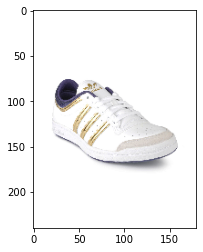

In [33]:
plt.imshow((given_img_data[8].reshape(240, 180,3)))

In [21]:
len(given_img_data)

10

In [22]:
len(df_styles_csv)

44424

In [23]:
df_styles_csv.dtypes

id                      int64
gender                 object
masterCategory         object
subCategory            object
articleType            object
baseColour             object
season                 object
year                  float64
usage                  object
productDisplayName     object
dtype: object

In [24]:
df_styles_csv_new = df_styles_csv.drop_duplicates()

In [25]:
df_styles_csv.count()

id                    44424
gender                44424
masterCategory        44424
subCategory           44424
articleType           44424
baseColour            44409
season                44403
year                  44423
usage                 44107
productDisplayName    44417
dtype: int64

In [26]:
df_styles_csv.describe()

,id,year
count,44424.000000,44423.000000
mean,29696.334301,2012.806497
std,17049.490518,2.126480
min,1163.000000,2007.000000
25%,14768.750000,2011.000000
50%,28618.500000,2012.000000
75%,44683.250000,2015.000000
max,60000.000000,2019.000000


In [27]:
df_styles_csv[df_styles_csv['articleType'] == "Shirts"]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
15,12369,Men,Apparel,Topwear,Shirts,Purple,Fall,2011.0,Formal,Reid & Taylor Men Check Purple Shirts
30,37812,Men,Apparel,Topwear,Shirts,Navy Blue,Summer,2012.0,Formal,John Players Men Navy Blue Shirt
...,...,...,...,...,...,...,...,...,...,...
44322,24684,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Highlander Men Navy Blue Check Shirt
44346,23667,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Spykar Men Navy Blue Check Shirt
44351,6005,Men,Apparel,Topwear,Shirts,Red,Summer,2011.0,Casual,Highlander Men Red Blue Checked Slim Fit Shirt
44386,23031,Men,Apparel,Topwear,Shirts,White,Fall,2012.0,Formal,Arrow Men White Striped Shirt


In [28]:
df_styles_csv['articleType'].count()

44424

<AxesSubplot:>

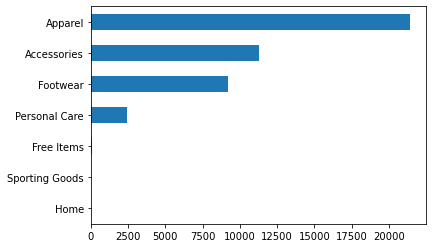

In [29]:
df_styles_csv.masterCategory.value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

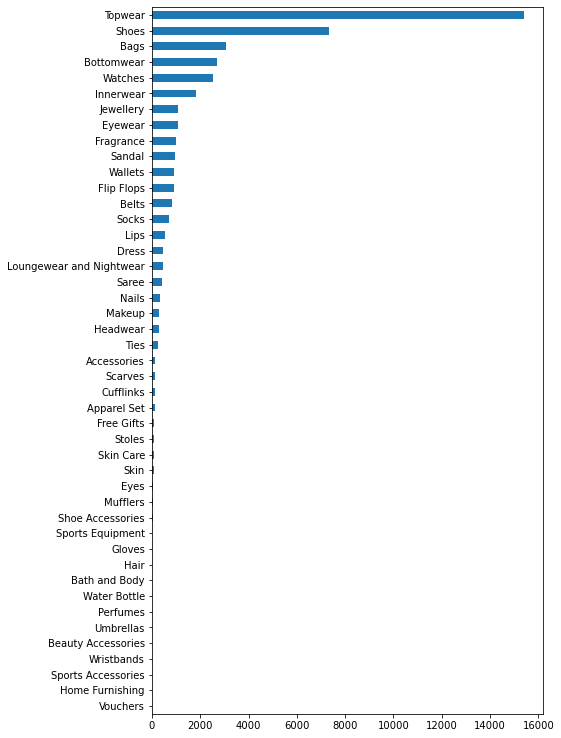

In [30]:
plt.figure(figsize=(7,13))
df_styles_csv.subCategory.value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

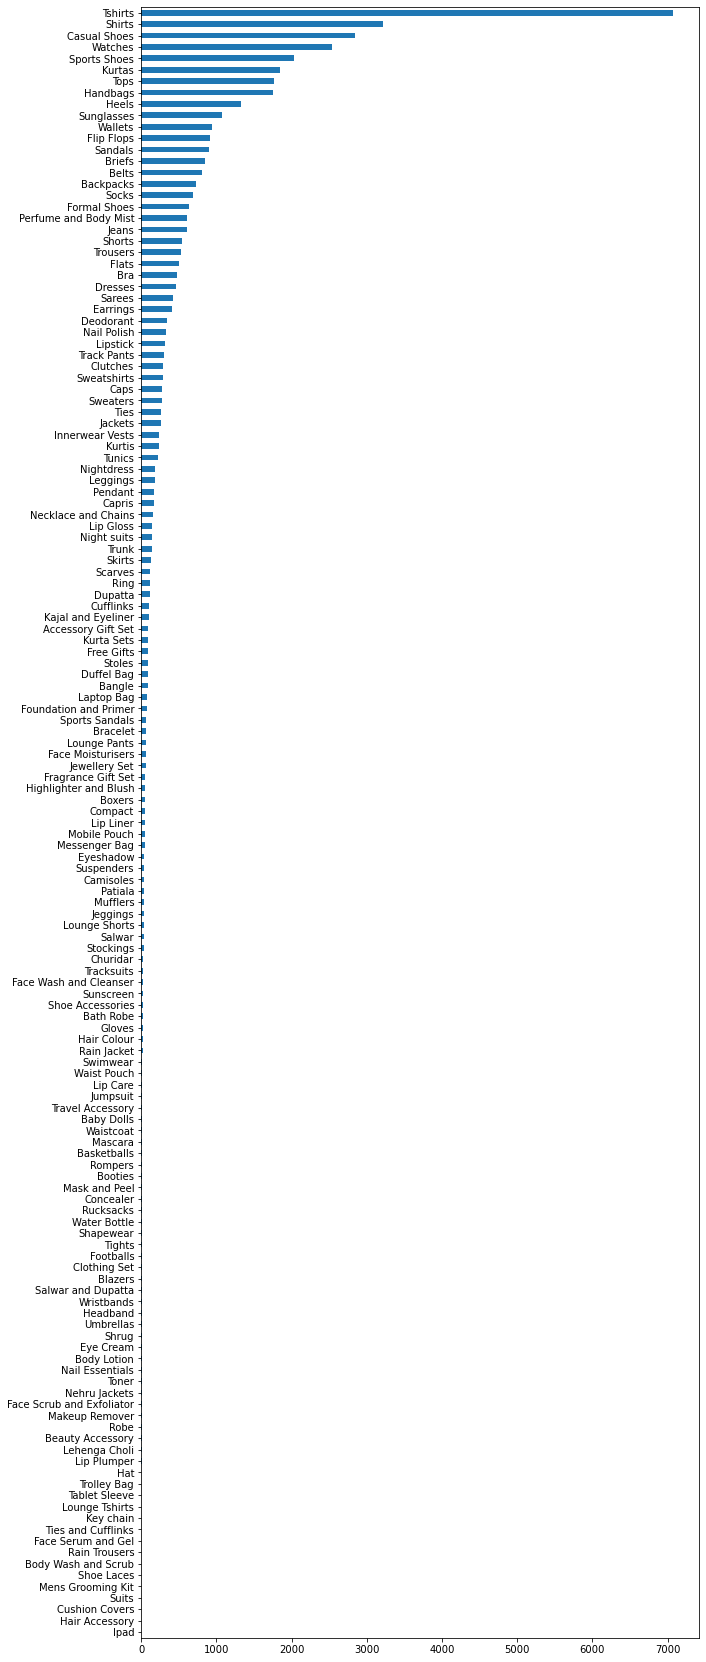

In [34]:
plt.figure(figsize=(10,30))
df_styles_csv.articleType.value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

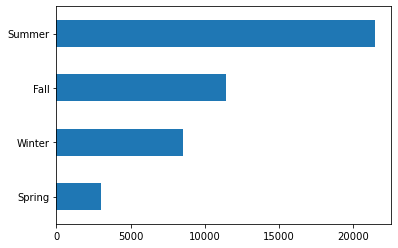

In [35]:
df_styles_csv.season.value_counts().sort_values().plot(kind='barh')

In [36]:
df_styles_csv.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


<AxesSubplot:xlabel='count', ylabel='articleType'>

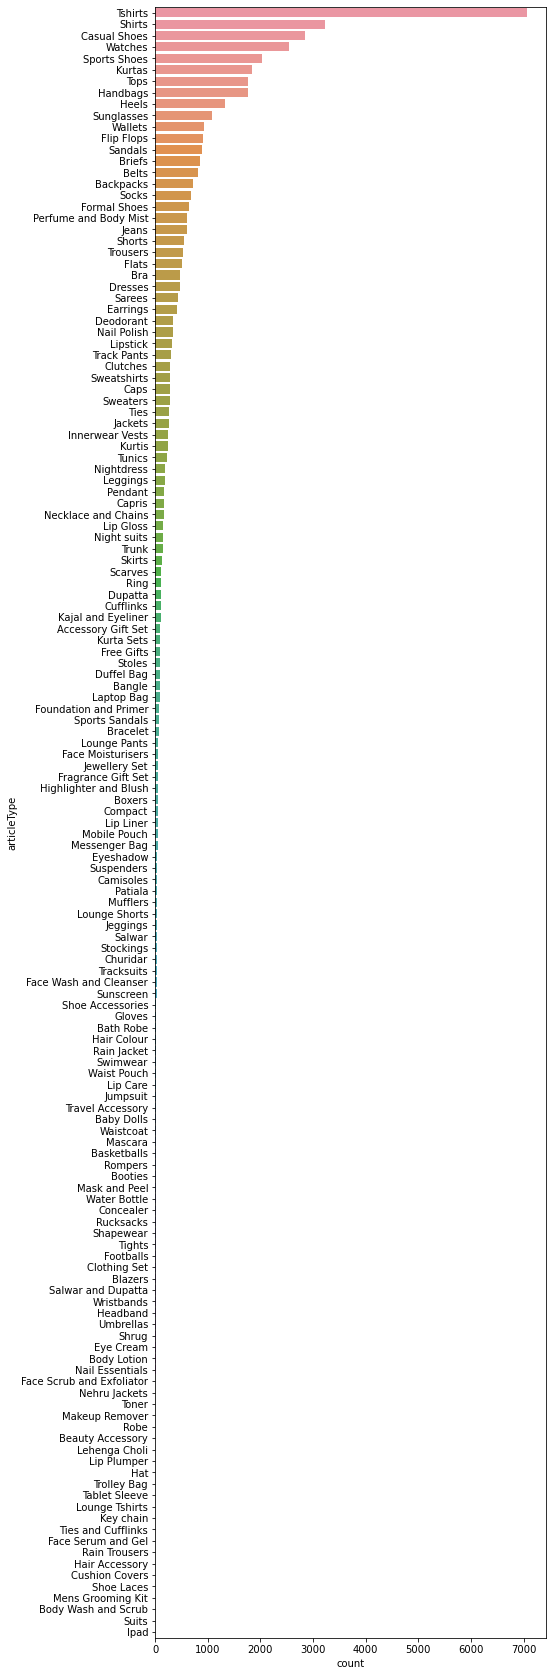

In [37]:
plt.figure(figsize=(7,30))
sns.countplot(y = "articleType", 
              data = df_styles_csv, 
              order = df_styles_csv['articleType'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='articleType'>

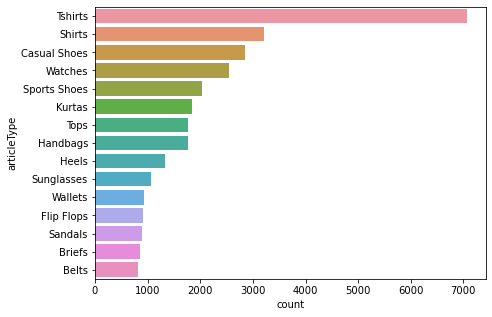

In [38]:
plt.figure(figsize=(7,5))
sns.countplot(y = "articleType", 
              data = df_styles_csv, 
              order = df_styles_csv['articleType'].value_counts().iloc[:15].index)

<AxesSubplot:xlabel='count', ylabel='subCategory'>

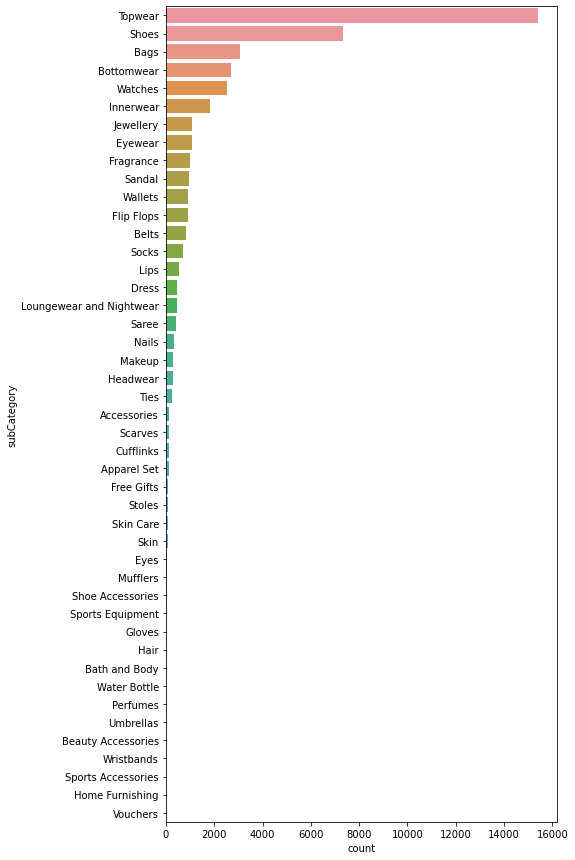

In [39]:
plt.figure(figsize=(7,15))
sns.countplot(y = "subCategory", 
              data = df_styles_csv, 
              order = df_styles_csv['subCategory'].value_counts().index)

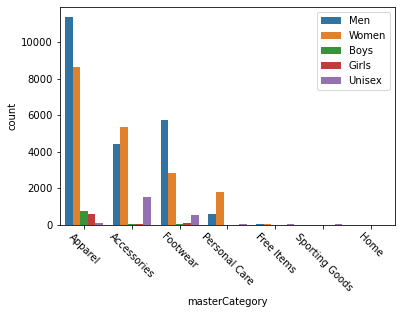

In [40]:
sns.countplot(x = "masterCategory",
              hue = "gender",
              data = df_styles_csv, 
              order = df_styles_csv['masterCategory'].value_counts().index)
plt.xticks(rotation= -45)
plt.legend(loc = "upper right")
plt.show()

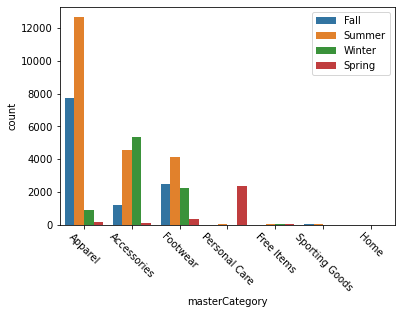

In [41]:
sns.countplot(x = "masterCategory",
              hue = "season",
              data = df_styles_csv, 
              order = df_styles_csv['masterCategory'].value_counts().index)
plt.xticks(rotation= -45)
plt.legend(loc = "upper right")
plt.show()


<AxesSubplot:xlabel='season', ylabel='count'>

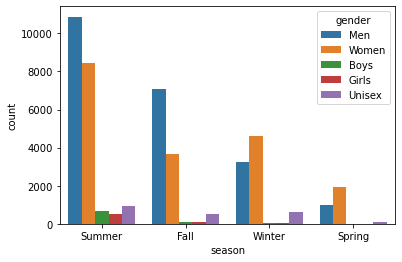

In [42]:
sns.countplot(x = "season",
              hue = "gender",
              data = df_styles_csv, 
              order = df_styles_csv['season'].value_counts().index)

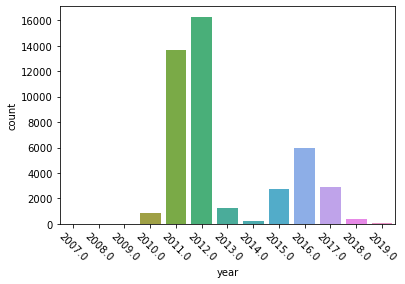

In [43]:
s = sns.countplot(x = "year",
              data = df_styles_csv)
plt.xticks(rotation= -45)
plt.show()

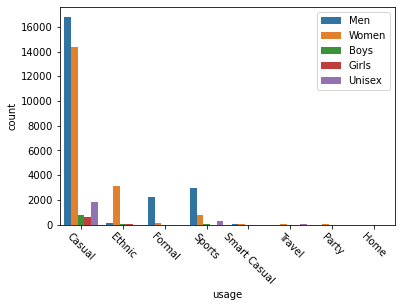

In [44]:
sns.countplot(x = "usage",
              hue = "gender",
              data = df_styles_csv)
plt.xticks(rotation= -45)
plt.legend(loc = "upper right")
plt.show()


<AxesSubplot:xlabel='gender', ylabel='count'>

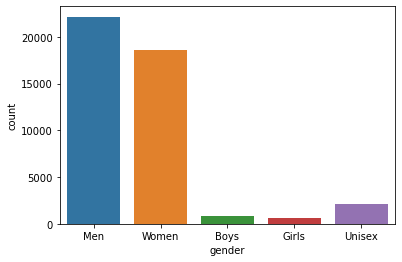

In [45]:
sns.countplot(x = "gender",
              data = df_styles_csv)

In [46]:
df_styles_heat = df_styles_csv.drop(['id', 'productDisplayName', 'year'], axis = 1)

In [47]:
 articletype_high= 5
articletype_five = list(df_styles_csv.groupby(['subCategory', 'articleType'])['id'].agg({'count'}).nlargest(columns = 'count', n = articletype_high).reset_index()['articleType'])

In [48]:
articletype_five

['Tshirts', 'Shirts', 'Casual Shoes', 'Watches', 'Sports Shoes']

In [49]:
df_articletype_high = df_styles_csv[df_styles_csv['articleType'].isin(articletype_five)]

In [50]:
df_ranked = df_articletype_high.groupby('articleType', group_keys=False).apply(lambda x: x.sample(min(len(x), 1000))).reset_index(drop = True)

In [51]:
df_ranked['articleType'] = df_ranked['articleType'].astype('category')
df_ranked['label'] = df_ranked['articleType'].cat.codes
df_ranked.head()
df_ranked = df_ranked.loc[:, ['id', 'label','articleType']]


In [52]:
df_ranked

,id,label,articleType
0,25488,0,Casual Shoes
1,5343,0,Casual Shoes
2,22704,0,Casual Shoes
3,17758,0,Casual Shoes
4,15502,0,Casual Shoes
...,...,...,...
4995,45153,4,Watches
4996,59213,4,Watches
4997,11188,4,Watches
4998,45878,4,Watches


In [53]:
df_ranked.shape

(5000, 3)

In [55]:
given_data = []
y_label = []
for i in df_ranked['id']:
    filepath = '/Users/preethi/Downloads/fashion-dataset/images/'+str(i)+'.jpg'  
    temp = load_img(filepath, target_size = (120, 120, 3))
    temp = img_to_array(temp).flatten()
    temp /= 255
    given_data.append(temp)
    y_label.append(i)

In [56]:
y_label

[25488,
 5343,
 22704,
 17758,
 15502,
 9089,
 21568,
 5911,
 11976,
 14496,
 26530,
 12425,
 8982,
 33687,
 22157,
 9213,
 13074,
 25490,
 8249,
 3646,
 49499,
 22851,
 18561,
 4506,
 4740,
 10772,
 18550,
 21571,
 57530,
 12506,
 15397,
 44757,
 13187,
 24717,
 19925,
 11951,
 13071,
 4343,
 7797,
 49381,
 57513,
 44779,
 29563,
 44493,
 44936,
 5706,
 13365,
 9130,
 41844,
 15399,
 49511,
 4026,
 24184,
 24482,
 47680,
 3235,
 32943,
 3638,
 4024,
 38780,
 13360,
 31329,
 44412,
 23091,
 42043,
 13901,
 12522,
 53727,
 47092,
 36480,
 9387,
 14577,
 15883,
 20877,
 2641,
 15262,
 41450,
 41466,
 36432,
 38775,
 54519,
 3560,
 21735,
 15512,
 40450,
 36444,
 34753,
 39735,
 4129,
 12920,
 21570,
 55785,
 15316,
 15270,
 24249,
 41211,
 3556,
 15893,
 6648,
 18542,
 2508,
 26656,
 10632,
 36435,
 24188,
 2511,
 1544,
 37244,
 21741,
 7407,
 10627,
 13367,
 21743,
 22504,
 26634,
 21566,
 2499,
 33846,
 2505,
 20696,
 32556,
 35466,
 3798,
 39269,
 30239,
 4020,
 39965,
 34790,
 11958,

In [57]:
given_data = np.array(given_data, dtype = float)

### PCA ON 5000 images

In [58]:
pca = PCA().fit(given_data)

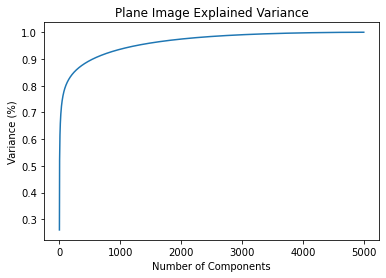

In [59]:
from matplotlib import pyplot
fig = pyplot.figure()
pyplot.plot(np.cumsum(pca.explained_variance_ratio_))
pyplot.xlabel('Number of Components')
pyplot.ylabel('Variance (%)') 
pyplot.title('Plane Image Explained Variance')
pyplot.show()

In [60]:
pca = PCA(n_components = 300,svd_solver = 'auto')
pca.fit(given_data)
pca_img_data= pca.transform(given_data)

Text(0.5, 1.0, 'PCA Plot for Data')

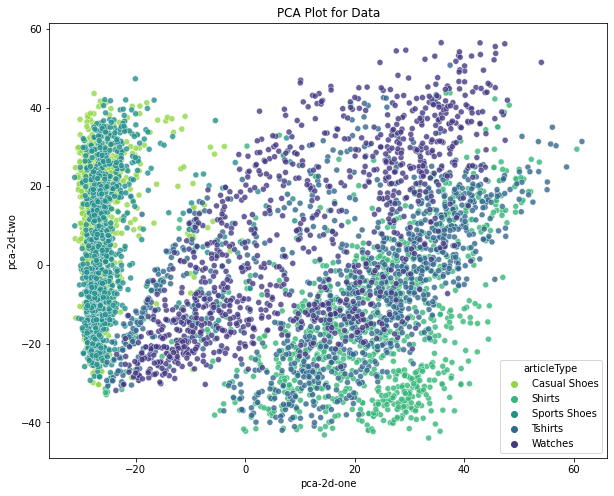

In [61]:
df_ranked['pca-2d-one'] = pca_img_data[:,0]
df_ranked['pca-2d-two'] = pca_img_data[:,1]
plt.figure(figsize=(10,8))
sns.scatterplot(x="pca-2d-one", y="pca-2d-two",hue="articleType",data=df_ranked,legend="full",palette='viridis_r',alpha=0.8).set_title("PCA Plot for Data")

### TSNE ON 5000 images

In [62]:
tsne = TSNE().fit(given_data)

In [64]:
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=500,method='exact')
tsne_results = tsne.fit_transform(given_data)

<AxesSubplot:title={'center':'TSNE Plot for Data'}>

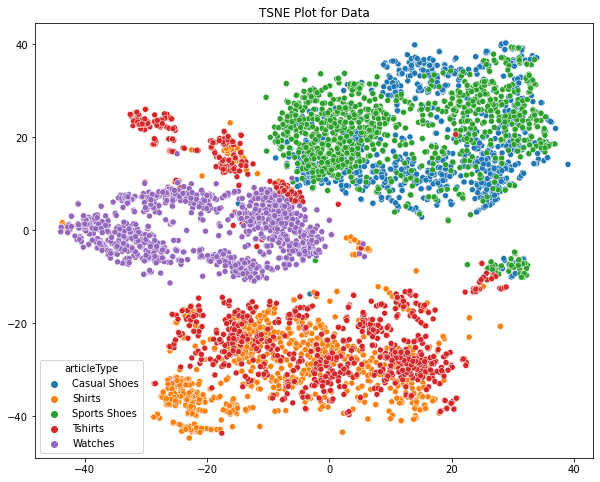

In [65]:
tsne_1 = tsne_results[:, 0]
tsne_2 = tsne_results[:, 1]
plt.figure(figsize=(10,8))
plt.title("TSNE Plot for Data")
sns.scatterplot(x=tsne_1, y= tsne_2,  hue = df_ranked['articleType'])

### TSNE ON PCA FOR 5000 images

In [66]:
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=500)
tsne_on_pca = tsne.fit_transform(pca_img_data)

<AxesSubplot:title={'center':'TSNE PLot on PCA Components '}>

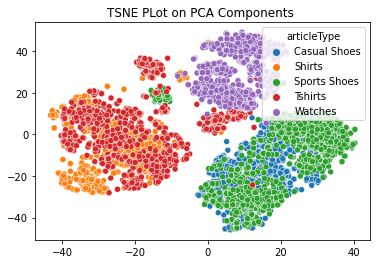

In [68]:
df_ranked['tsne-2d-one'] = tsne_on_pca[:,0]
df_ranked['tsne-2d-two'] = tsne_on_pca[:,1]

tsne_1 = tsne_on_pca[:, 0]
tsne_2 = tsne_on_pca[:, 1]
plt.title("TSNE PLot on PCA Components ")
sns.scatterplot(tsne_1, tsne_2, hue = df_ranked['articleType'])

### KMEANS on PCA

In [69]:
cluster = []
kmeans = KMeans(n_clusters = 5)
kmeans.fit(pca_img_data)
cluster.append(kmeans.predict(pca_img_data))
h = kmeans.predict(pca_img_data)

In [70]:
x = []
for each in range(0,len(cluster)):
    for i in cluster[each]:
        x.append(i)
pca_1 = pca_img_data[:, 0]
pca_2 = pca_img_data[:, 1]
kmeans_on_pca = pd.DataFrame(columns = ['pca_2d_one', 'pca_2d_two', 'cluster'])

for i, j, k in zip(pca_1, pca_2, x):
    kmeans_on_pca = kmeans_on_pca.append({'pca_2d_one' : i, 'pca_2d_two' : j, 'cluster' : int(k)}, ignore_index=True)

Text(0.5, 1.0, 'KMeans with PCA')

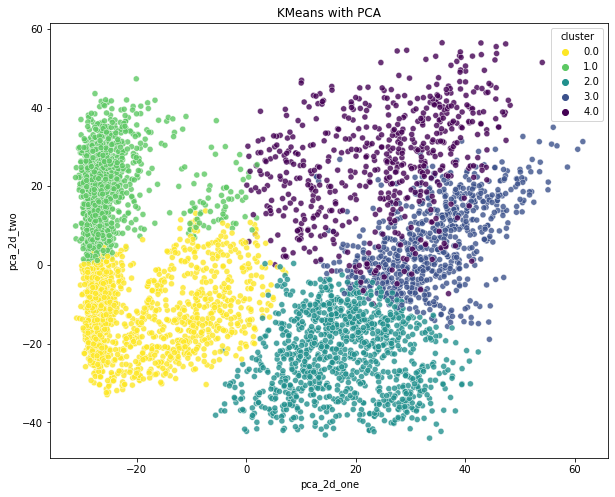

In [71]:
plt.figure(figsize=(10,8))
sns.set_palette(sns.color_palette("muted", 7))
sns.scatterplot(x="pca_2d_one", y="pca_2d_two",hue= 'cluster',data=kmeans_on_pca,legend="full",alpha=0.8,palette='viridis_r').set_title("KMeans with PCA")

In [72]:
cluster_centers = kmeans.cluster_centers_
cluster_labels_km = kmeans.labels_

In [73]:
sc = metrics.silhouette_score(given_data, h, metric = 'euclidean')
ch = metrics.calinski_harabasz_score(given_data, h)
print(sc)
print(ch)

0.14526907286625035
833.0211326606275


### KMEANS ON TSNE

In [74]:
cluster = []
kmeans = KMeans(n_clusters = 5)
kmeans.fit(tsne_results)
cluster.append(kmeans.predict(tsne_results))
h = kmeans.predict(tsne_results)

x = []
for each in range(0,len(cluster)):
    for i in cluster[each]:
        x.append(i)

In [76]:
kmeans_on_tsne = pd.DataFrame(columns = ['tsne1', 'tsne2', 'cluster'])

for i, j, k in zip(tsne_1, tsne_2, x):
    kmeans_on_tsne = kmeans_on_tsne.append({'tsne1' : i, 'tsne2' : j, 'cluster' : int(k)}, ignore_index=True)

Text(0.5, 1.0, 'KMeans with TSNE ')

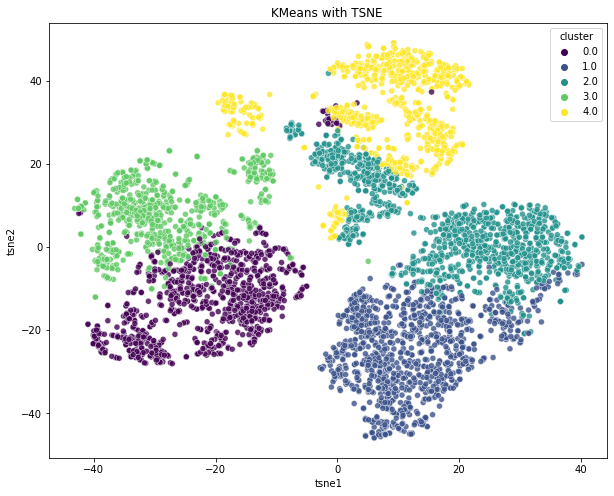

In [77]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="tsne1", y="tsne2",hue ='cluster',data=kmeans_on_tsne,legend="full",alpha=0.8,palette='viridis')
plt.title("KMeans with TSNE ")

In [78]:
cluster_centers = kmeans.cluster_centers_
cluster_labels_km = kmeans.labels_

In [79]:
sc = metrics.silhouette_score(given_data, h, metric = 'euclidean')
ch = metrics.calinski_harabasz_score(given_data, h)
print(sc)
print(ch)

0.11512060503082538
691.8391776101975


### GMM Clustering with PCA

In [80]:
cluster_gmm = []
gmm = GaussianMixture(n_components = 5)
gmm.fit(pca_img_data)
cluster_gmm.append(gmm.predict(pca_img_data))
h = gmm.predict(pca_img_data)

Text(0.5, 1.0, 'GMM with PCA')

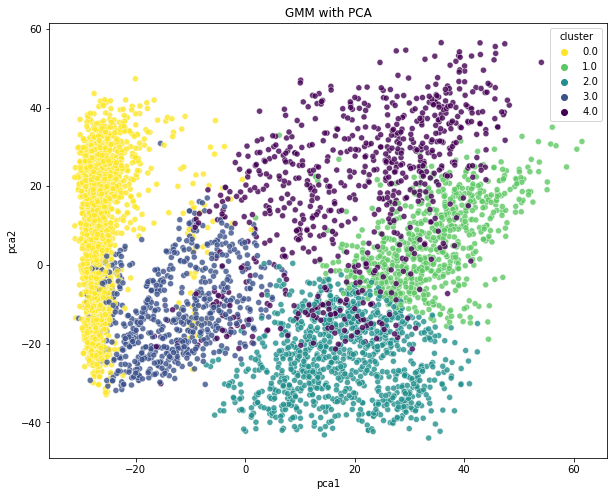

In [81]:
cluster_gmm = []
gmm = GaussianMixture(n_components = 5)
gmm.fit(pca_img_data)
cluster_gmm.append(gmm.predict(pca_img_data))
x = []
for each in range(0,len(cluster_gmm)):
    for i in cluster_gmm[each]:
        x.append(i)
        
gmm_on_pca = pd.DataFrame(columns = ['pca1', 'pca2', 'cluster'])

for i, j, k in zip(pca_1, pca_2, x):
    gmm_on_pca = gmm_on_pca.append({'pca1' : i, 'pca2' : j, 'cluster' : int(k)}, ignore_index=True)

plt.figure(figsize=(10,8))
sns.scatterplot(x="pca1", y="pca2",hue='cluster',data=gmm_on_pca,legend="full",alpha=0.8,palette='viridis_r').set_title("GMM with PCA")

In [82]:
sc = metrics.silhouette_score(given_data, h, metric = 'euclidean')
ch = metrics.calinski_harabasz_score(given_data, h)
print(sc)
print(ch)

0.09777645533424968
698.6285569133179


### GMM ON TSNE

Text(0.5, 1.0, 'GMM With TSNE')

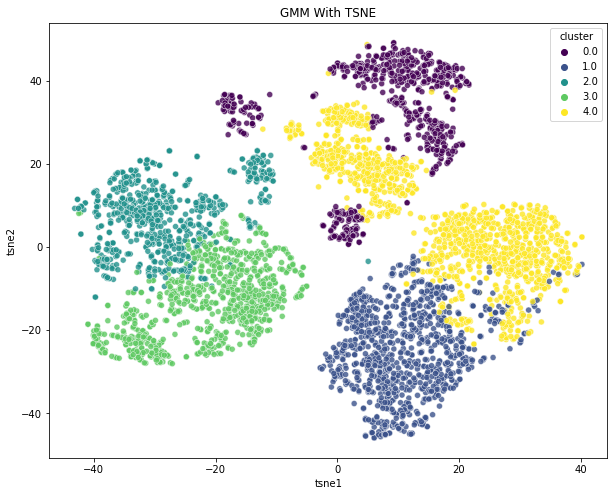

In [83]:
cluster_gmm = []
gmm = GaussianMixture(n_components = 5)
gmm.fit(tsne_results)
cluster_gmm.append(gmm.predict(tsne_results))
h = gmm.predict(tsne_results)
x = []
for each in range(0,len(cluster_gmm)):
    for i in cluster_gmm[each]:
        x.append(i)
        
gmm_on_tsne = pd.DataFrame(columns = ['tsne1', 'tsne2', 'cluster'])

for i, j, k in zip(tsne_1, tsne_2, x):
    gmm_on_tsne = gmm_on_tsne.append({'tsne1' : i, 'tsne2' : j, 'cluster' : int(k)}, ignore_index=True)
plt.figure(figsize=(10,8))   
sns.scatterplot(x="tsne1", y="tsne2",hue='cluster',data=gmm_on_tsne,legend="full",alpha=0.8,palette='viridis')
plt.title("GMM With TSNE")

In [84]:
sc = metrics.silhouette_score(given_data, h, metric = 'euclidean')
ch = metrics.calinski_harabasz_score(given_data, h)
print(sc)
print(ch)

0.10920295088005062
648.8412230087216


### Agglomerative Clustering on PCA

Text(0.5, 1.0, 'Agglomerative with PCA')

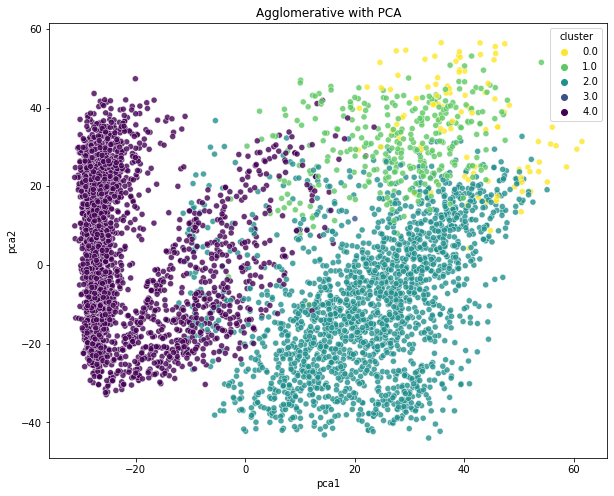

In [85]:
clustering_pca_comp = AgglomerativeClustering(linkage='complete',n_clusters = 5).fit(pca_img_data)
labels = clustering_pca_comp.labels_
Agglo_on_pca = pd.DataFrame(columns = ['pca1', 'pca2', 'cluster'])

for i, j, k in zip(pca_1, pca_2, labels):
    Agglo_on_pca = Agglo_on_pca.append({'pca1' : i, 'pca2' : j, 'cluster' : int(k)}, ignore_index=True)
plt.figure(figsize=(10,8))
sns.scatterplot(x="pca1", y="pca2",hue='cluster',data=Agglo_on_pca,legend="full",alpha=0.8,palette='viridis_r').set_title("Agglomerative with PCA")

In [86]:
cluster_labels_agg = clustering_pca_comp.labels_
sc = metrics.silhouette_score(given_data, cluster_labels_agg, metric = 'euclidean')
ch = metrics.calinski_harabasz_score(given_data, cluster_labels_agg)
print(sc)
print(ch)

0.19720739287441663
485.52819844762524


### Agglomerative clustering on TSNE

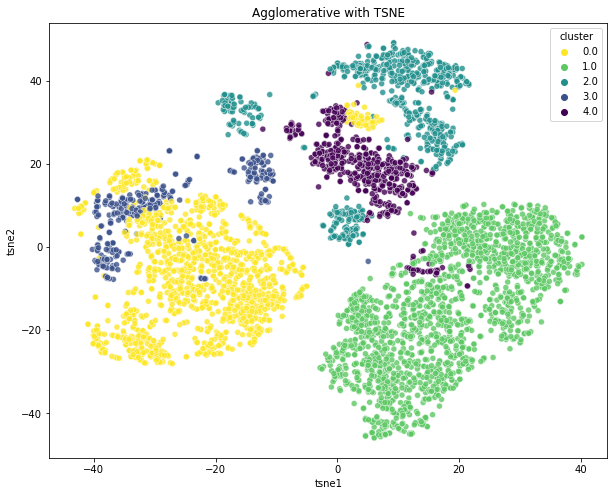

In [87]:
clustering_img_complete = AgglomerativeClustering(linkage='complete',n_clusters = 5).fit(tsne_results)
labels = clustering_img_complete.labels_
Agglo_on_tsne = pd.DataFrame(columns = ['tsne1', 'tsne2', 'cluster'])

for i, j, k in zip(tsne_1, tsne_2, labels):
    Agglo_on_tsne = Agglo_on_tsne.append({'tsne1' : i, 'tsne2' : j, 'cluster' : int(k)}, ignore_index=True)

plt.figure(figsize=(10,8))
sns.scatterplot(x="tsne1", y="tsne2",hue='cluster',data=Agglo_on_tsne,legend="full",alpha=0.8,palette='viridis_r').set_title("Agglomerative with TSNE")
plt.show()

In [88]:
cluster_labels_agg = clustering_pca_comp.labels_
sc = metrics.silhouette_score(given_data, cluster_labels_agg, metric = 'euclidean')
ch = metrics.calinski_harabasz_score(given_data, cluster_labels_agg)
print(sc)
print(ch)

0.19720739287441663
485.52819844762524


### TRYING Recommendation with KMeans

In [89]:
X_img_train, X_img_test, y_label_train, y_label_test = train_test_split(given_data, y_label, test_size=0.20, random_state=42)

### COSINE SIMILARITY

In [117]:
def get_recommendation_cosine(img,articletype_five):
    temp = X_img_train.copy()
    temp=np.vstack([temp,img])
    l = len(temp)
    cosine_sim = 1 - pairwise_distances(temp, metric='cosine')
    sim_scores = list(enumerate(cosine_sim[l-1]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:articletype_five+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    return idx_rec, idx_sim

In [133]:
def display_recommendation_cosine(ref_img,articletype_five ):
    
    #Getting recommendations
    idx_rec, idx_sim = get_recommendation_cosine(ref_img, articletype_five)
    rec_images = []
    for r in idx_rec:
        rec_images.append(X_img_train[r])
    rec_images = np.array(rec_images)
#     print(ref_img)
    #plotting original image
    plt.imshow(np.uint8(ref_img*255).reshape(120, 120,3))
    plt.title("Original Image")
    plt.show()
    
    #Plotting recommendations
    fig, ax = plt.subplots(1, articletype_five, figsize=(8, 3))
    rec = rec_images.reshape(articletype_five, 120, 120,3)
    for axi, center in zip(ax.flat, rec):
        axi.set(xticks=[], yticks=[])
        axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    return idx_rec

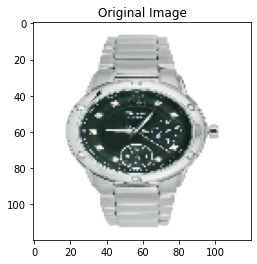

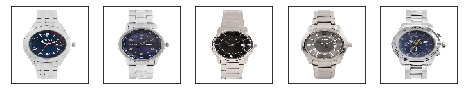

In [135]:
test_img_num = 700
rec_ind = display_recommendation_cosine(X_img_test[test_img_num], 5)

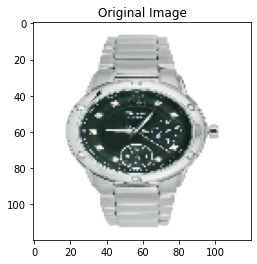

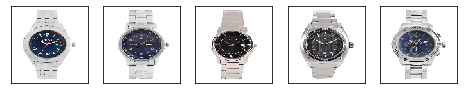

In [126]:
test_img_num = 700
rec_ind=display_recommendation_spatial_dist(X_img_test[test_img_num], 5)

### DISTANCE MATRIX

In [123]:
def reduced_images(img):
    temp = X_img_train.copy()
    temp=np.vstack([temp,img])
    pca = PCA(n_components = 500)
    pca_rec = pca.fit_transform(temp)
    return pca_rec

In [124]:
from scipy.spatial import distance_matrix
def get_recommendation_spatial_dist(img,articletype_five ):
    temp = reduced_images(img)
    l = len(temp)
    dist_sim = distance_matrix(temp, temp)
    dist_scores = list(enumerate(dist_sim[l-1]))
    dist_scores = sorted(dist_scores, key=lambda x: x[1], reverse=False)
    dist_scores = dist_scores[1:articletype_five+1]
#     print(dist_scores)
    idx_rec    = [i[0] for i in dist_scores]
    idx_sim    = [i[1] for i in dist_scores]
    return idx_rec, idx_sim

In [134]:
def display_recommendation_spatial_dist(ref_img,articletype_five ):
    
    #Getting recommendations
    idx_rec, idx_sim = get_recommendation_spatial_dist(ref_img, articletype_five)
    rec_images = []
    for r in idx_rec:
        rec_images.append(X_img_train[r])
    rec_images = np.array(rec_images)
    
#     #plotting original image
    plt.imshow(np.uint8(ref_img*255).reshape(120, 120, 3))
    plt.title("Original Image")
    plt.show()
    
    #Plotting recommendations
    fig, ax = plt.subplots(1, articletype_five, figsize=(8, 3))
    rec = rec_images.reshape(articletype_five, 120, 120, 3)
#     print(rec)
    for axi, center in zip(ax.flat, rec):
#         print(center)
        axi.set(xticks=[], yticks=[])
        axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    return idx_rec

In [ ]:
test_img_num = 150
rec_ind=display_recommendation_spatial_dist(X_img_test[test_img_num], 5)

In [ ]:
test_img_num = 700
rec_ind=display_recommendation_spatial_dist(X_img_test[test_img_num], 5)

In [129]:
def precision_k(ref_id, rec_id,k):
    tp=0
    #fp=0
    tp_cnt=5
    for i in rec_id:
        #print(i)
        #print(tp)
        if(df_styles_csv['gender'][df_styles_csv.id==y_label_train[i]].iloc[0] == df_styles_csv['gender'][df_styles_csv.id==ref_id].iloc[0]):
            tp=tp+1/tp_cnt
        if(df_styles_csv['masterCategory'][df_styles_csv.id==y_label_train[i]].iloc[0]==df_styles_csv['masterCategory'][df_styles_csv.id==ref_id].iloc[0]):
            tp=tp+1/tp_cnt
        if(df_styles_csv['subCategory'][df_styles_csv.id==y_label_train[i]].iloc[0]==df_styles_csv['subCategory'][df_styles_csv.id==ref_id].iloc[0]):
            tp=tp+1/tp_cnt
        if(df_styles_csv['articleType'][df_styles_csv.id==y_label_train[i]].iloc[0]==df_styles_csv['articleType'][df_styles_csv.id==ref_id].iloc[0]):
            tp=tp+1/tp_cnt
        if(df_styles_csv['baseColour'][df_styles_csv.id==y_label_train[i]].iloc[0]==df_styles_csv['baseColour'][df_styles_csv.id==ref_id].iloc[0]):
            tp=tp+1/tp_cnt
#         if(df_styles_csv['season'][df_styles_csv.id==y_label_train[i]].iloc[0]==df_styles_csv['season'][df_styles_csv.id==ref_id].iloc[0]):
#             tp=tp+1/tp_cnt
#         if(df_styles_csv['usage'][df_styles_csv.id==y_label_train[i]].iloc[0]==df_styles_csv['usage'][df_styles_csv.id==ref_id].iloc[0]):
#             tp=tp+1tp_cnt
        
#         tp=tp/7
    return tp/k

In [130]:
img_id = [105, 500, 700, 705, 750]
sum_cosine = 0
sum_spatial = 0
for i in range(len(img_id)):
    test_img_num = img_id[i]
#     print(test_img_num)
    rec_ind_cosine = display_recommendation_cosine(X_img_test[test_img_num], 5)
#     print(test_img_num, rec_ind_cosine)
    rec_ind_spatial = display_recommendation_spatial_dist(X_img_test[test_img_num], 5)
#     print(test_img_num, rec_ind_spatial)
    test_id = df_ranked[df_ranked['id'] == y_label_test[test_img_num]].id.iloc[0]
    p_cosine = precision_k(test_id, rec_ind_cosine, k=5)
    p_spatial = precision_k(test_id, rec_ind_spatial, k=5)
    sum_cosine  = sum_cosine + p_cosine
    sum_spatial = sum_spatial + p_spatial
average_cosine = sum_cosine/len(img_id)
avergae_spatial = sum_spatial/len(img_id)

In [131]:
average_cosine

0.7440000000000002

In [132]:
avergae_spatial

0.7520000000000002